# Instalación y configuración de Hadoop

**Introducción al Big Data Analytics**

Máster en inteligencia computacional e internet de las cosas. Universidad de Córdoba

Curso 2022/2023

Profesora: Aurora Ramírez Quesada

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
Basado en la documentación oficial de Apache: https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/SingleCluster.html


### Paso 1: Descargar Hadoop
Hadoop es un entorno Java gestionado por la [Apache Software Foundation](https://hadoop.apache.org/). La última versión estable es la [3.3.4](https://hadoop.apache.org/releases.html) (2022). Una vez descargado, solo hay que extraer y descomprimir el archivo. A continuación, se copia el contenido a la ruta donde se quiera ubicar, en este caso, */usr/local*

In [2]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.4/hadoop-3.3.4.tar.gz

--2022-12-19 16:49:23--  https://downloads.apache.org/hadoop/common/hadoop-3.3.4/hadoop-3.3.4.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695457782 (663M) [application/x-gzip]
Saving to: ‘hadoop-3.3.4.tar.gz’

hadoop-3.3.4.tar.gz 100%[===================>] 663.24M  25.0MB/s    in 27s     

2022-12-19 16:49:50 (24.3 MB/s) - ‘hadoop-3.3.4.tar.gz’ saved [695457782/695457782]



In [3]:
!tar -xzvf hadoop-3.3.4.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
hadoop-3.3.4/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/package-tree.html
hadoop-3.3.4/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceMappingManager.html
hadoop-3.3.4/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/DeviceResourceHandlerImpl.html
hadoop-3.3.4/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodemanager/apidocs/org/apache/hadoop/yarn/server/nodemanager/containermanager/resourceplugin/deviceframework/ShellWrapper.html
hadoop-3.3.4/share/doc/hadoop/hadoop-yarn/hadoop-yarn-server/hadoop-yarn-server-nodema

In [4]:
!cp -r hadoop-3.3.4/ /usr/local/

### Paso 2: Configurar Java Home
Hadoop necesita que le indiquemos dónde se ubica la instalación de Java. Para encontrar la ruta, se utiliza el comando readlink.

In [5]:
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


La ruta al path de Java debe incluirse en el fichero ***hadoop-env.sh***, que está en el directorio: */usr/local/hadoop-3.3.4/etc/hadoop*

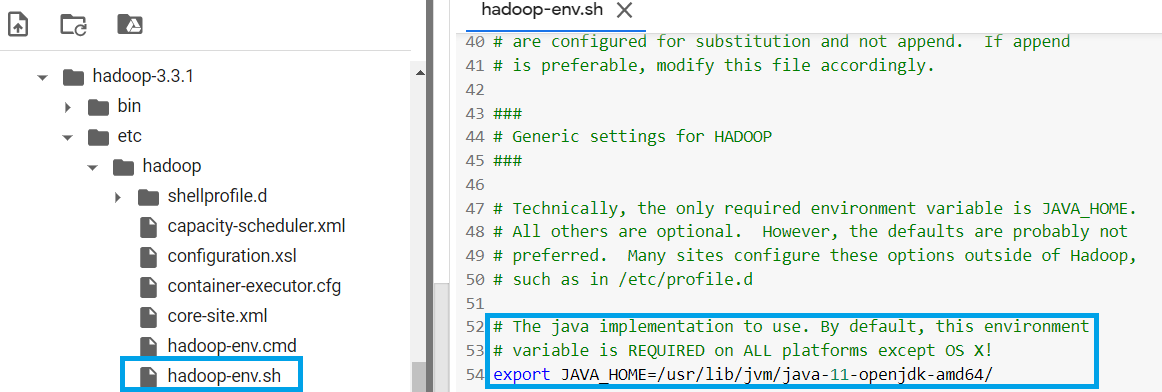

Tras descargar el fichero y añadir la ruta, subimos el archivo con los cambios y lo movemos desde la carpeta raiz hasta /usr/local/hadoop-3.3.4/etc/hadoop:

In [11]:
!cp /hadoop-env.sh /usr/local/hadoop-3.3.4/etc/hadoop/

### Paso 3: Comprobar el comando hadoop
El comando **hadoop** es el encargado de ejecutar los procesos sobre Hadoop. Se encuentra ubicado en /bin. Para ver sus opciones, utilizamos la opción --help

In [12]:
!/usr/local/hadoop-3.3.4/bin/hadoop --help

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
              required libraries
conftest 

### Paso 4: Probar la ejecución de un proceso MapReduce

Dentro del directorio /share/hadoop/mapreduce hay una serie de ejemplos. Estos ejemplos se pueden ejecutar como simples procesos Java, en un modo no distribuido.

Para el ejemplo, se van a utilizar los propios ficheros de configuración de Hadoop como entrada. Primero, se crea un directorio /home/input donde se copian los archivos de configuración en formato XML

In [15]:
!mkdir /home/input/
!cp /usr/local/hadoop-3.3.4/etc/hadoop/*.xml /home/input

A continuación, se lanza el ejemplo (archivo jar) que consiste en buscar la expresión regular 'dfs[a-z.]+' en los ficheros de configuración copiados en /home/input. La salida se escribe en /home/output y también se muestra por consola.

In [19]:
!/usr/local/hadoop-3.3.4/bin/hadoop jar /usr/local/hadoop-3.3.4/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.4.jar grep /home/input /home/output 'dfs[a-z.]+'
!cat /home/output/*

2022-12-19 17:01:36,296 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2022-12-19 17:01:36,517 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2022-12-19 17:01:36,517 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2022-12-19 17:01:36,746 INFO input.FileInputFormat: Total input files to process : 10
2022-12-19 17:01:36,796 INFO mapreduce.JobSubmitter: number of splits:10
2022-12-19 17:01:37,202 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1505621643_0001
2022-12-19 17:01:37,202 INFO mapreduce.JobSubmitter: Executing with tokens: []
2022-12-19 17:01:37,490 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2022-12-19 17:01:37,491 INFO mapreduce.Job: Running job: job_local1505621643_0001
2022-12-19 17:01:37,504 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2022-12-19 17:01:37,514 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2022